In [1]:
import pandas as pd
import numpy as np 

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [4]:
data.shape

(3283, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3283 non-null   float64
 1   High    3283 non-null   float64
 2   Low     3283 non-null   float64
 3   Close   3283 non-null   float64
 4   Volume  3283 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.9 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,3.714812,3.788431,3.636149,3.708224,131365.895218
std,1.831245,1.866609,1.790444,1.826208,54415.091229
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691500,2.737000,2.644000,2.693000,91735.000000
50%,3.253000,3.313000,3.184000,3.242000,126609.000000
75%,4.158500,4.245000,4.068000,4.153000,161479.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


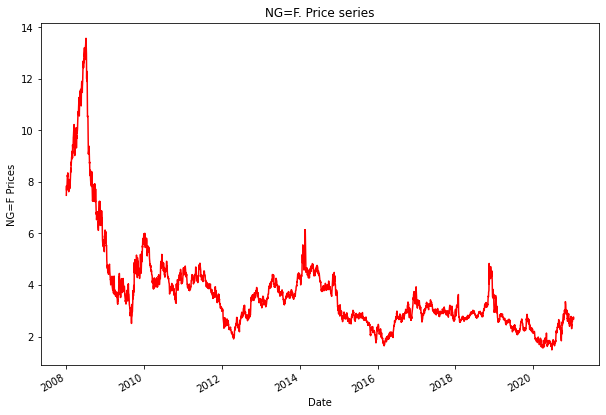

In [10]:
data.Close.plot(figsize=(10, 7),color = "r")
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price series".format(stocks))
plt.show()

C:\Users\Salome\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

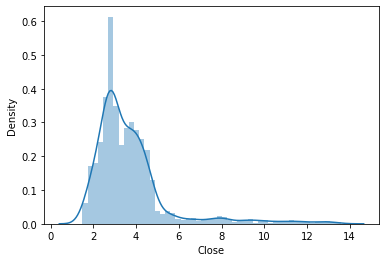

In [11]:
sns.distplot(data["Close"])

C:\Users\Salome\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

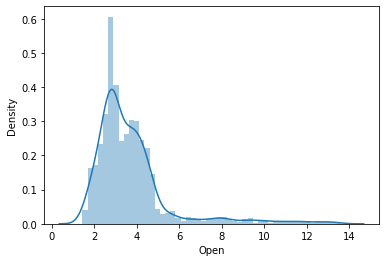

In [12]:
sns.distplot(data["Open"])

In [15]:
#shape of the data
#how data is distributed
#its is very nonlinear-stock price prediction is very nonlinear

#linear regression, logistic regression, regularized regression techniques, svm (support vector machine)

X =data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(2626, 4)
(2626,)
(657, 4)
(657,)


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

print(pred1)

[ 2.69263125  5.62775289  2.67593446  5.70059119  3.7941102  13.2233934
  3.96973992  1.84058023  1.79578996  1.92988411  2.48501196  3.27902664
  2.87223557  2.97788951  4.26721237  2.57749429  3.44524095  2.72173285
  9.00107585  3.61963762  1.7802419   2.66344549  2.54589019  2.91238601
  2.3834322   3.21828194  3.68985393  3.88874655  2.89436113  1.82668276
  4.02022772  2.99235628 11.50173894  4.37936147  4.42032125  2.6264692
  3.52318183  5.47030452  3.79465214  3.42236918  3.97028677  2.70335735
  1.87448306  2.6098818   1.92071192  1.74599183  4.21605553  2.98374319
  3.85474126  1.99358448  4.08094844  3.5786507   2.48258324  4.10339979
  1.92736655  3.23535888  4.54311568  5.059409    1.85311728  3.27418655
  2.92296426  4.0916382   4.79600944  2.70006357  4.825725    2.20432073
  4.3684868   3.08206643  2.83099057  2.11235998  4.75093495  2.72114503
  1.8452126   3.47763478  8.15124536  3.27627993  4.66440381  4.37075016
  3.94807359  1.7801768   2.9604658   2.18229184  7.7

In [22]:
#calculating the strength of the 
#linear regression model on the data set given
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(pred1, y_test):
    mse = mean_squared_error(pred1, y_test)
    mae = mean_absolute_error(pred1, y_test)
    rmse = np.sqrt(mse)
    r2_scor = r2_score(pred1, y_test)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2_score", r2_scor)
    
calculate_metrics(pred1, y_test)

MSE:  0.0013865447236433984
RMSE:  0.03723633606631295
MAE:  0.025674679413868206
r2_score 0.999492007193048


In [23]:
from sklearn.linear_model import Lasso, Ridge

las = Lasso()
las.fit(X_train, y_train)
pred = las.predict(X_test)

calculate_metrics(pred, y_test)


MSE:  0.2308019154905662
RMSE:  0.48041847954732775
MAE:  0.3254703605629072
r2_score 0.8441103252547912


In [24]:
rid = Ridge()
rid.fit(X_train, y_train)
pred2 = rid.predict(X_test)

calculate_metrics(pred2, y_test)

MSE:  0.001448547900692366
RMSE:  0.03805979375525262
MAE:  0.02723926052561311
r2_score 0.9994693039284244


In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

params_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVR(), params_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.071 total time=   0.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.064 total time=   0.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.043 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.8s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.067 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.042 total time=   0.9s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.080 total time=   0.9s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   1.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   1.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   1.3s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.008 total time=   1.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   1.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   1.3s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.005 total time=   1.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.000 total time=   1.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.015 total time=   1.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.014 total time=   1.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma = 0.01,  kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
